<a href="https://colab.research.google.com/github/JoanChege/CHATBOT1/blob/main/Model_training1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

import re
import nltk
import json
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
# Import and preprocess data
with open('/content/dataset3.json') as f:
    intents = json.load(f)

num_intents = len(intents['intents'])

stop_words = set(stopwords.words('english'))
data = []
labels = []

if intents is not None:
    # Preprocess data
    for intent in intents['intents']:
        for pattern in intent['patterns']:
            # Tokenize, filter stopwords, lemmatize
            tokenized_pattern = nltk.word_tokenize(pattern)
            filtered_pattern = [word.lower() for word in tokenized_pattern if word.isalnum() and not word in stop_words]
            lemmatizer = WordNetLemmatizer()
            lemmatized_pattern = [lemmatizer.lemmatize(word) for word in filtered_pattern]

            data.append(' '.join(lemmatized_pattern))
            labels.append(intent['tag'])


In [3]:
# Create a Pandas DataFrame
df = pd.DataFrame({'Patterns': data, 'Tags': labels})

In [4]:
df

,Patterns,Tags
0,hi,greeting
1,hey,greeting
2,is anyone,greeting
3,hi,greeting
4,hello,greeting
...,...,...
5986,i think absolutely i need i think i realized t...,
5987,what i supposed i ca get head i depressed some...,
5988,med counseling sorted,
5989,deleted,


In [5]:
# Determine vocab size
# Use set to get unique words
unique_words = set()
for text in df['Patterns']:
    unique_words.update(text.split())

# Get number of unique words
num_words = len(unique_words)

# Determine max sequence length
max_seq_len = df['Patterns'].apply(lambda x: len(x.split())).max()

# Pickle data
pickle.dump(df['Patterns'], open('data.pkl', 'wb'))
pickle.dump(df['Tags'], open('labels.pkl', 'wb'))


In [6]:
# Encode the Labels by converting tags into numerical form
encoder = LabelEncoder()
df['Tags'] = encoder.fit_transform(df['Tags'])
df['Tags'] = to_categorical(df['Tags'])

In [7]:
# Encode data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
encoded_data = tokenizer.texts_to_sequences(data)

# Pad sequences
#padded_data = pad_sequences(encoded_data)

# Encode text
#X_train = tokenizer.texts_to_sequences(data)

# Encode labels
#y_train = np.array(labels)

In [8]:
df

,Patterns,Tags
0,hi,0.0
1,hey,0.0
2,is anyone,0.0
3,hi,0.0
4,hello,0.0
...,...,...
5986,i think absolutely i need i think i realized t...,0.0
5987,what i supposed i ca get head i depressed some...,0.0
5988,med counseling sorted,0.0
5989,deleted,0.0


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
#The CountVectorizer converts the text data into numerical vectors by counting the occurrence of each word in the text
vectorizer = CountVectorizer()
vectorizer.fit(data)

X = vectorizer.transform(data) # transform text to feature vectors
y = df['Tags']

train_ratio = 0.8 #80%
val_ratio = 0.1 #10%
test_ratio = 0.1 #10%

from sklearn.utils import shuffle
X, y = shuffle(X, y)

total = X.shape[0]

train_size = int(train_ratio * total)
val_size = int(val_ratio * total)
test_size = int(test_ratio * total)

# Encode labels as unique intergers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(labels)
#y_train = np.array(labels)


In [10]:
print(X.shape[0])
print(len(y))

5991
5991


In [11]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Split train into train/validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [12]:
print(X_train)

  (0, 479)	1
  (0, 769)	1
  (0, 1182)	1
  (0, 1371)	1
  (0, 1868)	1
  (0, 2021)	1
  (0, 4444)	1
  (0, 5350)	1
  (0, 5755)	1
  (0, 5876)	1
  (0, 7456)	1
  (0, 7462)	1
  (0, 8499)	1
  (0, 9280)	1
  (1, 474)	2
  (1, 581)	1
  (1, 647)	1
  (1, 834)	1
  (1, 1059)	1
  (1, 1099)	1
  (1, 1827)	1
  (1, 1917)	1
  (1, 1973)	1
  (1, 2825)	1
  (1, 3203)	1
  :	:
  (3829, 6416)	1
  (3830, 357)	1
  (3830, 1099)	1
  (3830, 3663)	1
  (3830, 5516)	1
  (3830, 7239)	1
  (3830, 9283)	1
  (3830, 9357)	1
  (3830, 9576)	1
  (3831, 6058)	1
  (3831, 7220)	1
  (3831, 9394)	1
  (3832, 581)	1
  (3832, 1258)	1
  (3832, 1546)	1
  (3832, 3593)	1
  (3832, 4200)	1
  (3832, 4201)	1
  (3832, 4706)	1
  (3832, 6376)	1
  (3832, 6692)	1
  (3832, 7447)	1
  (3832, 7456)	2
  (3832, 8856)	1
  (3832, 10260)	1


In [13]:
print(y_train)

[ 1  1  1 ...  1  1 15]


In [14]:
print(X_train.shape[0])
print(len(y_train))

3833
3833


In [15]:
num_classes = len(le.classes_)
y_train = np.reshape(y_train, (-1,1))

In [16]:
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2

# Define LSTM model
model = Sequential()

# Add embedding layer
model.add(Embedding(input_dim=num_words, output_dim=200, input_length=X_train.shape[1]))

# Add LSTM layers
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(256, kernel_regularizer=l2(0.001)))
#, recurrent_regularizer=l2(0.001) ,bias_regularizer=l2(0.001)
# Add dropout layer
model.add(Dropout(0.8))

#Add output layer with relu
model.add(Dense(64, activation='relu'))

#Add dropout layer
model.add(Dropout(0.8))

# Add output layer
model.add(Dense(num_intents, activation='softmax'))

In [17]:
print(y_train.shape)
print(model.predict(X_train).shape)

(3833, 1)
120/120 [==============================] - 55s 446ms/step
(3833, 5796)


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10412, 200)        2089200   
                                                                 
 lstm (LSTM)                 (None, 10412, 256)        467968    
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 5796)              3

In [19]:
num_classes = 5796 # From model output layer units

y_train = np.array(y_train)
y_train = y_train.reshape(-1, 1)

num_classes = model.layers[-1].units
y_train = np.resize(y_train, (X_train.shape[0],))

In [34]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
print(X_train.shape)
print(y_train.shape)

(3833, 10412)
(3833,)


In [36]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min',
    restore_best_weights=True
)

In [ ]:
hist = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size = 64, verbose = 2, callbacks = [early_stopping])


Epoch 1/30
60/60 - 126s - loss: 1.5338 - accuracy: 0.8933 - val_loss: 1.1805 - val_accuracy: 0.9030 - 126s/epoch - 2s/step
Epoch 2/30


In [24]:
import matplotlib.pyplot as plt
def plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epochs')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

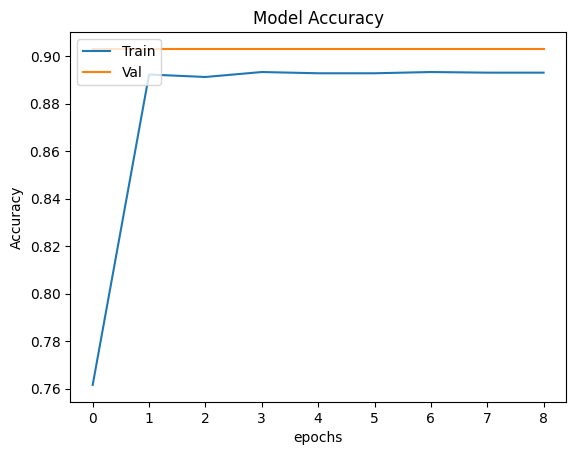

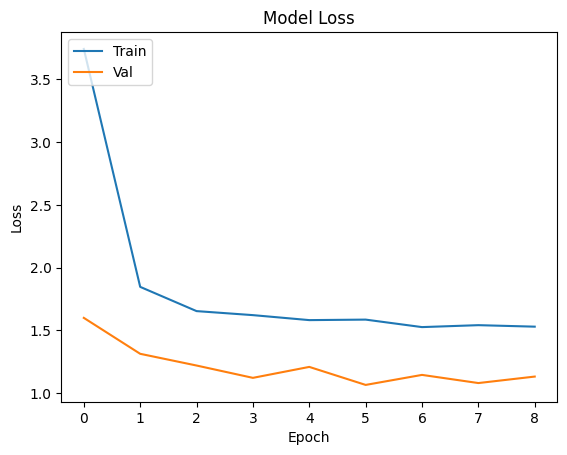

In [25]:
plot(hist)

USE BLEU SCORE

In [26]:
model.save("chatbot_model.h5")
print('Done')

Done


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
from nltk.translate.bleu_score import sentence_bleu
from keras.models import load_model

# Load trained model
model = load_model('chatbot_model.h5')

# Example input text
input_text = "Hello! How are you?"

# Define index->word mappings
word_to_index = # Load mapping from file
index_to_word = {v:k for k, v in word_to_index.items()}

# Preprocess input text
tokenizer = nltk.WhitespaceTokenizer()
input_seq = tokenizer.tokenize(input_text)
input_seq = pad_sequences([input_seq], maxlen=max_seq_len)

# Generate prediction from model
pred = model.predict(input_seq).argmax(axis=-1)[0]
pred_text = ' '.join([index_to_word[x] for x in pred])

reference = "I'm good, thanks for asking!"

def calc_scores(y_true, y_pred):

  bleu_scores = []
  brevity_penalties = []

  for true, pred in zip(y_true, y_pred):

    true_tokens = true.split()
    pred_tokens = pred.split()

    # Calculate BLEU
    bleu = sentence_bleu([true_tokens], pred_tokens)

    # Calculate Brevity Penalty
    bp = min(1, len(true_tokens)/len(pred_tokens))

    bleu_scores.append(bleu)
    brevity_penalties.append(bp)

  return bleu_scores, brevity_penalties

bleu_score, brevity_penalty = calc_scores([reference], [pred_text])

print(f'BLEU Score: {bleu_score[0]}, Brevity Penalty: {brevity_penalty[0]}')

NameError: ignored

In [ ]:
# Decode a sequence back to text
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))
def decode_sequence(encoded_seq):
    return ' '.join([reverse_word_map.get(i, '?') for i in encoded_seq])